In [2]:
!pip install unrar
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install sklearn
!pip install mlrose-hiive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=fa9cdc4c29b3ce8e1673a3c13c1e74866fbb656092293e11fe0df8b42c63a113
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 49 kB 4.1 MB/s 
  Created wheel for mlrose-hiive: filename=mlrose_hiive-2.2.4-p

In [3]:
import mlrose_hiive
import requests
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_validate, validation_curve, learning_curve, GridSearchCV, KFold
from sklearn import metrics
from sklearn.metrics import make_scorer, f1_score, classification_report, confusion_matrix

In [4]:
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00497/divorce.rar"
response = requests.get(URL)
open("divorce.rar", "wb").write(response.content)

33041

In [5]:
!unrar x divorce.rar


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from divorce.rar

Extracting  divorce.csv                                                    6%  OK 
Extracting  divorce.xlsx                                                  99%  OK 
All OK


In [6]:
df = pd.read_csv('divorce.csv', skipinitialspace=True,index_col=False, delimiter=";")
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0,0,0,0,0,0,0,0,0,0,...,1,0,4,1,1,4,2,2,2,0
166,0,0,0,0,0,0,0,0,0,0,...,4,1,2,2,2,2,3,2,2,0
167,1,1,0,0,0,0,0,0,0,1,...,3,0,2,0,1,1,3,0,0,0
168,0,0,0,0,0,0,0,0,0,0,...,3,3,2,2,3,2,4,3,1,0


In [7]:
#Take a look at class distribution
df.groupby('Class').size()

Class
0    86
1    84
dtype: int64

In [8]:
y = df["Class"]
X = df.drop(['Class'], axis=1)

In [9]:
#Check correlations between features
corr_measure = X.corr()
#Sort features in descending order
corr_measure.loc['Atr1', :].sort_values(ascending=False)
#Pick the least 10 correlated
sorted_df = corr_measure.loc['Atr1', :].sort_values(ascending=False)
sorted_df.tail(10)

Atr42    0.642307
Atr48    0.633564
Atr53    0.611422
Atr47    0.582693
Atr52    0.575463
Atr45    0.510160
Atr43    0.482223
Atr7     0.427989
Atr46    0.400296
Atr6     0.287140
Name: Atr1, dtype: float64

In [10]:
df = df[['Class', 'Atr42','Atr48','Atr53','Atr47','Atr52','Atr45','Atr43','Atr7','Atr46','Atr6' ]]
y = df["Class"]
X = df.drop(['Class'], axis=1)

### RHC ###
Learning Rate: 0.0001
Restarts: 2
Time: 13.150140047073364
Learning Rate: 0.001
Restarts: 2
Time: 7.015841007232666
Learning Rate: 0.01
Restarts: 2
Time: 6.985352039337158
Learning Rate: 0.1
Restarts: 2
Time: 6.382894277572632
Average Time 15.683468446731567
Time: [[13.15014005 11.5941503  16.1180706  20.86606789 26.61592507]
 [ 7.01584101 11.64857817 16.19134331 20.99316597 26.27725887]
 [ 6.98535204 11.63797832 16.13685536 20.79729533 25.51813245]
 [ 6.38289428 10.64655662 14.9569025  19.22323251 23.65197062]
 [ 5.62736797 10.25422096 13.1501019  16.81614137 19.8311677 ]]
Test f1-score 0.9110723626852659
Confusion Matrix: [[17  0]
 [ 3 14]]
### SA ###
Learning Rate: 0.0001
Schedule: 0
Time: 3.311882734298706
Learning Rate: 0.01
Schedule: 0
Time: 3.1224870681762695
Learning Rate: 0.1
Schedule: 0
Time: 2.9412899017333984
Average Time 3.125233300526937
Time: [[3.31188273 3.26971602 3.30572343]
 [3.2123394  3.27465677 3.29716611]
 [3.12248707 3.1411767  3.2717886 ]
 [2.941289

<ErrorbarContainer object of 3 artists>

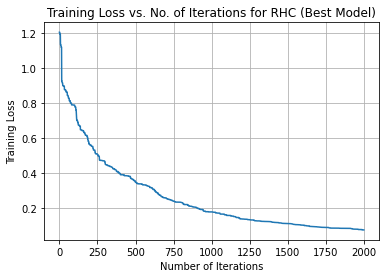

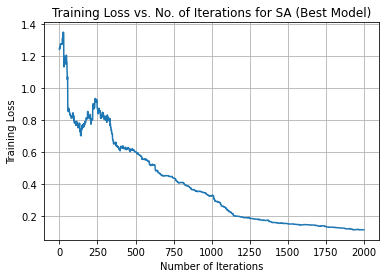

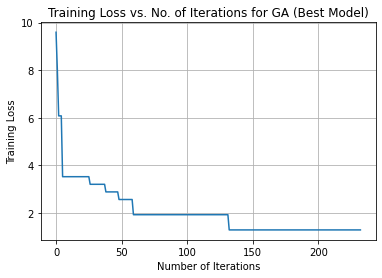

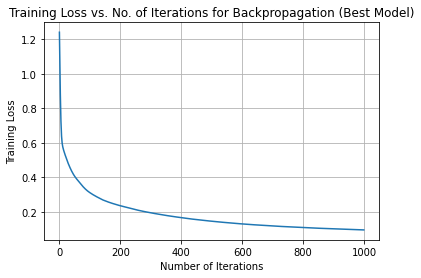

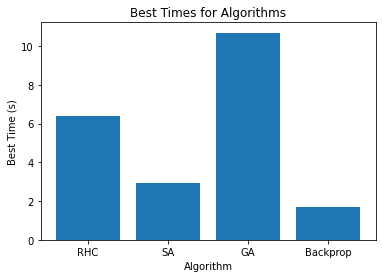

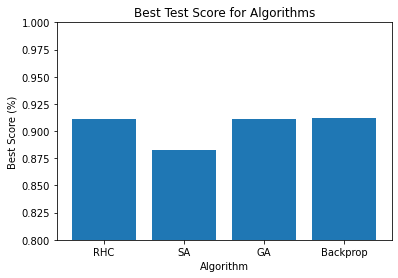

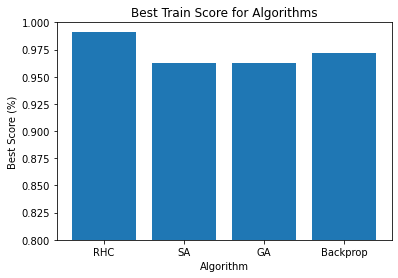

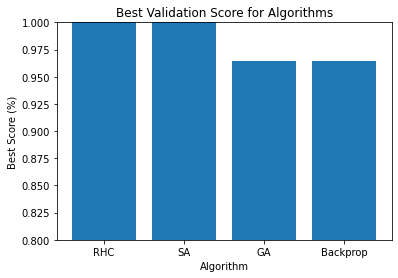

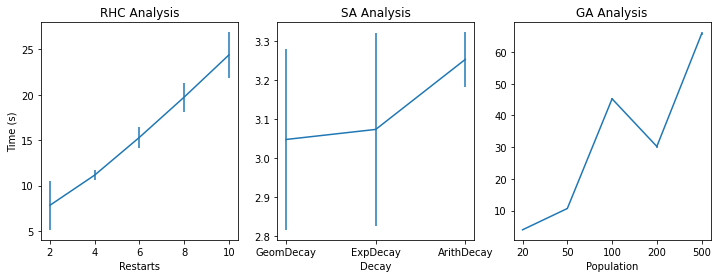

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42, stratify=y_train)

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1]
restarts = [2, 4, 6, 8, 10]
schedules = [mlrose_hiive.GeomDecay(), mlrose_hiive.ExpDecay(), mlrose_hiive.ArithDecay()]
populations = [20, 50, 100, 200, 500]

train_acc_rhc = np.zeros((len(learning_rates),len(restarts)))
val_acc_rhc = np.zeros((len(learning_rates),len(restarts)))
val_acc_rhc_best = 0.0
rhc_best_idx1 = 0
rhc_best_idx2 = 0
test_acc_rhc = np.zeros((len(learning_rates),len(restarts)))
time_rhc = np.zeros((len(learning_rates),len(restarts)))

train_acc_sa = np.zeros((len(learning_rates),len(schedules)))
val_acc_sa = np.zeros((len(learning_rates),len(schedules)))
val_acc_sa_best = 0.0
sa_best_idx1 = 0
sa_best_idx2 = 0
test_acc_sa = np.zeros((len(learning_rates),len(schedules)))
time_sa = np.zeros((len(learning_rates),len(schedules)))

train_acc_ga = np.zeros((len(learning_rates),len(populations)))
val_acc_ga = np.zeros((len(learning_rates),len(populations)))
val_acc_ga_best = 0.0
ga_best_idx1 = 0
ga_best_idx2 = 0
test_acc_ga = np.zeros((len(learning_rates),len(populations)))
time_ga = np.zeros((len(learning_rates),len(populations)))

train_acc_backprop = np.zeros((len(learning_rates),1))
val_acc_backprop = np.zeros((len(learning_rates),1))
val_acc_backprop_best = 0.0
backprop_best_idx1 = 0
backprop_best_idx2 = 0
test_acc_backprop = np.zeros((len(learning_rates),1))
time_backprop = np.zeros((len(learning_rates),1))


#Train with Random Hill Climbing 
print('### RHC ###')
nn_model_rhc_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='random_hill_climb', 
		                         	max_iters = 2000, bias = True, is_classifier = True, 
		                         	learning_rate = 0.00001, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
	for idx2, restart in enumerate(restarts):
		nn_model_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='random_hill_climb', 
		                         	max_iters = 2000, bias = True, restarts = restart, is_classifier = True, 
		                         	learning_rate = learning_rate, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

		start = time.time()
		nn_model_rhc.fit(X_train, y_train)
		end = time.time()
		time_rhc_current = end - start

		y_train_pred_rhc = nn_model_rhc.predict(X_train)
		y_train_accuracy_rhc = f1_score(y_train, y_train_pred_rhc, average='macro')
		train_acc_rhc[idx1][idx2] = y_train_accuracy_rhc

		y_val_pred_rhc = nn_model_rhc.predict(X_val)
		y_val_accuracy_rhc = f1_score(y_val, y_val_pred_rhc, average='macro')
		val_acc_rhc[idx1][idx2]= y_val_accuracy_rhc

		y_test_pred_rhc = nn_model_rhc.predict(X_test)
		y_test_accuracy_rhc = f1_score(y_test, y_test_pred_rhc, average='macro')
		test_acc_rhc[idx1][idx2] = y_test_accuracy_rhc
		time_rhc[idx1][idx2]= time_rhc_current

		if y_val_accuracy_rhc > val_acc_rhc_best:
			nn_model_rhc_best = nn_model_rhc
			print("Learning Rate:", learning_rate)
			print("Restarts:", restart)
			print("Time:", time_rhc_current)
			rhc_best_idx1 = idx1
			rhc_best_idx2 = idx2
			val_acc_rhc_best = y_val_accuracy_rhc

		

plt.figure()
plt.plot(nn_model_rhc_best.fitness_curve[:,0])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for RHC (Best Model)')

y_test_pred_rhc = nn_model_rhc_best.predict(X_test)
confusion_matrix_rhc = confusion_matrix(y_test, y_test_pred_rhc)

print("Average Time", np.mean(time_rhc))
print("Time:", time_rhc)
print("Test f1-score", test_acc_rhc[rhc_best_idx1][rhc_best_idx2])
print("Confusion Matrix:", confusion_matrix_rhc)


#Train with Simulated Annealing 
print('### SA ###')
nn_model_sa_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='simulated_annealing', 
		                         	max_iters = 2000, bias = True, is_classifier = True, 
		                         	learning_rate = 0.00001, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
	for idx2, schedule in enumerate(schedules):
		nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='simulated_annealing', 
		                         	max_iters = 2000, bias = True, schedule = schedule, is_classifier = True, 
		                         	learning_rate = learning_rate, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

		start = time.time()
		nn_model_sa.fit(X_train, y_train)
		end = time.time()
		time_sa_current = end - start

		y_train_pred_sa = nn_model_sa.predict(X_train)
		y_train_accuracy_sa = f1_score(y_train, y_train_pred_sa, average='macro')
		train_acc_sa[idx1][idx2] = y_train_accuracy_sa

		y_val_pred_sa = nn_model_sa.predict(X_val)
		y_val_accuracy_sa = f1_score(y_val, y_val_pred_sa, average='macro')
		val_acc_sa[idx1][idx2]= y_val_accuracy_sa

		y_test_pred_sa = nn_model_sa.predict(X_test)
		y_test_accuracy_sa = f1_score(y_test, y_test_pred_sa, average='macro')
		test_acc_sa[idx1][idx2] = y_test_accuracy_sa
		time_sa[idx1][idx2]= time_sa_current

		if y_val_accuracy_sa > val_acc_sa_best:
			nn_model_sa_best = nn_model_sa
			print("Learning Rate:", learning_rate)
			print("Schedule:", idx2)
			print("Time:", time_sa_current)
			sa_best_idx1 = idx1
			sa_best_idx2 = idx2
			val_acc_sa_best = y_val_accuracy_sa

		

plt.figure()
plt.plot(nn_model_sa_best.fitness_curve[:,0])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for SA (Best Model)')

y_test_pred_sa = nn_model_sa_best.predict(X_test)
confusion_matrix_sa = confusion_matrix(y_test, y_test_pred_sa)

print("Average Time", np.mean(time_sa))
print("Time:", time_sa)
print("Test f1-score", test_acc_sa[sa_best_idx1][sa_best_idx2])
print("Confusion Matrix:", confusion_matrix_sa)



#Train with Genetic Algorithm 
print('### GA ###')
nn_model_ga_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='genetic_alg', 
		                         	max_iters = 500, bias = True, is_classifier = True, 
		                         	learning_rate = 0.00001, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
	for idx2, population in enumerate(populations):
		nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='genetic_alg', 
		                         	max_iters = 500, bias = True, pop_size = population, is_classifier = True, 
		                         	learning_rate = learning_rate, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

		start = time.time()
		nn_model_ga.fit(X_train, y_train)
		end = time.time()
		time_ga_current = end - start

		y_train_pred_ga = nn_model_ga.predict(X_train)
		y_train_accuracy_ga = f1_score(y_train, y_train_pred_ga, average='macro')
		train_acc_ga[idx1][idx2] = y_train_accuracy_ga

		y_val_pred_ga = nn_model_ga.predict(X_val)
		y_val_accuracy_ga = f1_score(y_val, y_val_pred_ga, average='macro')
		val_acc_ga[idx1][idx2]= y_val_accuracy_ga

		y_test_pred_ga = nn_model_ga.predict(X_test)
		y_test_accuracy_ga = f1_score(y_test, y_test_pred_ga, average='macro')
		test_acc_ga[idx1][idx2] = y_test_accuracy_ga
		time_ga[idx1][idx2]= time_ga_current

		if y_val_accuracy_ga > val_acc_ga_best:
			nn_model_ga_best = nn_model_ga
			print("Learning Rate:", learning_rate)
			print("Population:", population)
			print("Time:", time_ga_current)
			ga_best_idx1 = idx1
			ga_best_idx2 = idx2
			val_acc_ga_best = y_val_accuracy_ga

		

plt.figure()
plt.plot(nn_model_ga_best.fitness_curve[:,0])
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for GA (Best Model)')

y_test_pred_ga = nn_model_ga_best.predict(X_test)
confusion_matrix_ga = confusion_matrix(y_test, y_test_pred_ga)

print("Average Time", np.mean(time_ga))
print("Time:", time_ga)
print("Test f1-score", test_acc_ga[ga_best_idx1][ga_best_idx2])
print("Confusion Matrix:", confusion_matrix_ga)


#Train with Backward Propagation 
print('### Backprop ###')
nn_model_backprop_best = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='gradient_descent', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = 0.00001, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

for idx1, learning_rate in enumerate(learning_rates):
	for idx2 in range(1):
		nn_model_backprop = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='gradient_descent', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = learning_rate, early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)

		start = time.time()
		nn_model_backprop.fit(X_train, y_train)
		end = time.time()
		time_backprop_current = end - start

		y_train_pred_backprop = nn_model_backprop.predict(X_train)
		y_train_accuracy_backprop = f1_score(y_train, y_train_pred_backprop, average='macro')
		train_acc_backprop[idx1][idx2] = y_train_accuracy_backprop

		y_val_pred_backprop = nn_model_backprop.predict(X_val)
		y_val_accuracy_backprop = f1_score(y_val, y_val_pred_backprop, average='macro')
		val_acc_backprop[idx1][idx2]= y_val_accuracy_backprop

		y_test_pred_backprop = nn_model_backprop.predict(X_test)
		y_test_accuracy_backprop = f1_score(y_test, y_test_pred_backprop, average='macro')
		test_acc_backprop[idx1][idx2] = y_test_accuracy_backprop
		time_backprop[idx1][idx2]= time_backprop_current

		if y_val_accuracy_backprop > val_acc_backprop_best:
			nn_model_backprop_best = nn_model_backprop
			print("Learning Rate:", learning_rate)
			print("Time:", time_backprop_current)
			backprop_best_idx1 = idx1
			backprop_best_idx2 = idx2
			val_acc_backprop_best = y_val_accuracy_backprop

		

plt.figure()
plt.plot(-nn_model_backprop_best.fitness_curve)
plt.grid()
plt.xlabel('Number of Iterations')
plt.ylabel('Training Loss')
plt.title('Training Loss vs. No. of Iterations for Backpropagation (Best Model)')

y_test_pred_backprop = nn_model_backprop_best.predict(X_test)
confusion_matrix_backprop = confusion_matrix(y_test, y_test_pred_backprop)

print("Average Time", np.mean(time_backprop))
print("Time:", time_backprop)
print("Test f1-score", test_acc_backprop[backprop_best_idx1][backprop_best_idx2])
print("Confusion Matrix:", confusion_matrix_backprop)


#plot graphs
plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [time_rhc[rhc_best_idx1][rhc_best_idx2], time_sa[sa_best_idx1][sa_best_idx2], time_ga[ga_best_idx1][ga_best_idx2], time_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Time (s)")
plt.title('Best Times for Algorithms')

plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [test_acc_rhc[rhc_best_idx1][rhc_best_idx2], test_acc_sa[sa_best_idx1][sa_best_idx2], test_acc_ga[ga_best_idx1][ga_best_idx2], test_acc_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Score (%)")
plt.title('Best Test Score for Algorithms')
plt.ylim((0.8,1.0))

plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [train_acc_rhc[rhc_best_idx1][rhc_best_idx2], train_acc_sa[sa_best_idx1][sa_best_idx2], train_acc_ga[ga_best_idx1][ga_best_idx2], train_acc_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Score (%)")
plt.title('Best Train Score for Algorithms')
plt.ylim((0.8,1.0))

plt.figure()
plt.bar(['RHC', 'SA', 'GA', 'Backprop'], [val_acc_rhc[rhc_best_idx1][rhc_best_idx2], val_acc_sa[sa_best_idx1][sa_best_idx2], val_acc_ga[ga_best_idx1][ga_best_idx2], val_acc_backprop[backprop_best_idx1][backprop_best_idx2]])
plt.xlabel("Algorithm")
plt.ylabel("Best Score (%)")
plt.title('Best Validation Score for Algorithms')
plt.ylim((0.8,1.0))

plt.figure(figsize = (12,4))
plt.tight_layout()
plt.subplot(131)
plt.xlabel("Restarts")
plt.ylabel("Time (s)")
plt.title("RHC Analysis")
plt.errorbar(x = ['2', '4', '6', '8', '10'], y = np.mean(time_rhc, axis = 0), yerr = np.std(time_rhc, axis = 0))
plt.subplot(132)
plt.xlabel("Decay")
plt.title("SA Analysis")
plt.errorbar(['GeomDecay', 'ExpDecay', 'ArithDecay'], np.mean(time_sa, axis = 0), yerr = np.std(time_sa, axis = 0))
plt.subplot(133)
plt.xlabel("Population")
plt.title("GA Analysis")
plt.errorbar(['20', '50', '100', '200', '500'], np.mean(time_ga, axis = 0), yerr = np.std(time_ga, axis = 0))


Text(0.5, 1.0, 'Learning Curve for RHC')

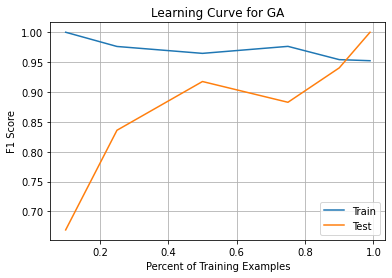

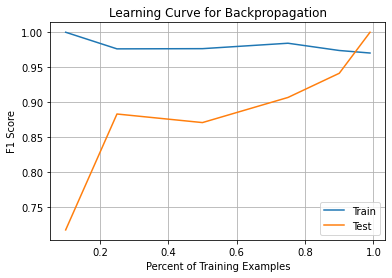

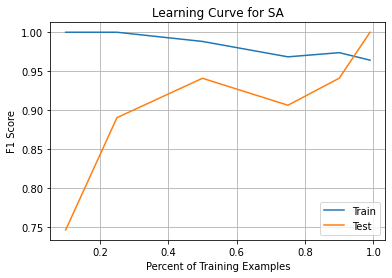

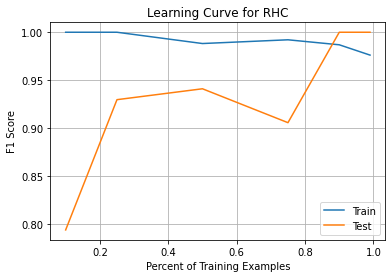

In [14]:

test_sizes = [ 0.9, 0.75, 0.5, 0.25, 0.1, 0.01]
train_acc_ga_lrc = []
test_acc_ga_lrc = []
train_acc_backprop_lrc = []
test_acc_backprop_lrc = []
train_acc_sa_lrc = []
test_acc_sa_lrc = []
train_acc_rhc_lrc = []
test_acc_rhc_lrc = []

for test_size in test_sizes:
	X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42, stratify=y)
	nn_model_ga = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='genetic_alg', 
		                         	max_iters = 500, bias = True, pop_size = populations[ga_best_idx2], is_classifier = True, 
		                         	learning_rate = learning_rates[ga_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	nn_model_backprop = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='gradient_descent', 
		                         	max_iters = 1000, bias = True, is_classifier = True, 
		                         	learning_rate = learning_rates[backprop_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	nn_model_sa = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='simulated_annealing', 
		                         	max_iters = 2000, bias = True, schedule = schedules[sa_best_idx2], is_classifier = True, 
		                         	learning_rate = learning_rates[sa_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	nn_model_rhc = mlrose_hiive.NeuralNetwork(hidden_nodes = [16], activation ='relu', 
		                         	algorithm ='random_hill_climb', 
		                         	max_iters = 2000, bias = True, restarts = restarts[rhc_best_idx2], is_classifier = True, 
		                         	learning_rate = learning_rates[rhc_best_idx1], early_stopping = True, 
		                         	max_attempts = 100, random_state = 42, curve = True)
	
	nn_model_ga.fit(X_train, y_train)

	y_train_pred_ga = nn_model_ga.predict(X_train)
	y_train_accuracy_ga = f1_score(y_train, y_train_pred_ga, average='macro')
	train_acc_ga_lrc.append(y_train_accuracy_ga)

	y_test_pred_ga = nn_model_ga.predict(X_test)
	y_test_accuracy_ga = f1_score(y_test, y_test_pred_ga, average='macro')
	test_acc_ga_lrc.append(y_test_accuracy_ga)

	nn_model_backprop.fit(X_train, y_train)

	y_train_pred_backprop = nn_model_backprop.predict(X_train)
	y_train_accuracy_backprop = f1_score(y_train, y_train_pred_backprop, average='macro')
	train_acc_backprop_lrc.append(y_train_accuracy_backprop)

	y_test_pred_backprop = nn_model_backprop.predict(X_test)
	y_test_accuracy_backprop = f1_score(y_test, y_test_pred_backprop, average='macro')
	test_acc_backprop_lrc.append(y_test_accuracy_backprop)

	nn_model_rhc.fit(X_train, y_train)

	y_train_pred_rhc = nn_model_rhc.predict(X_train)
	y_train_accuracy_rhc = f1_score(y_train, y_train_pred_rhc, average='macro')
	train_acc_rhc_lrc.append(y_train_accuracy_rhc)

	y_test_pred_rhc = nn_model_rhc.predict(X_test)
	y_test_accuracy_rhc = f1_score(y_test, y_test_pred_rhc, average='macro')
	test_acc_rhc_lrc.append(y_test_accuracy_rhc)

	nn_model_sa.fit(X_train, y_train)

	y_train_pred_sa = nn_model_sa.predict(X_train)
	y_train_accuracy_sa = f1_score(y_train, y_train_pred_sa, average='macro')
	train_acc_sa_lrc.append(y_train_accuracy_sa)

	y_test_pred_sa = nn_model_sa.predict(X_test)
	y_test_accuracy_sa = f1_score(y_test, y_test_pred_sa, average='macro')
	test_acc_sa_lrc.append(y_test_accuracy_sa)

train_sizes = [1 - test_size for test_size in test_sizes]

plt.figure()
plt.plot(train_sizes, train_acc_ga_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_ga_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curve for GA')

plt.figure()
plt.plot(train_sizes, train_acc_backprop_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_backprop_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curve for Backpropagation')

plt.figure()
plt.plot(train_sizes, train_acc_sa_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_sa_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curve for SA')
plt.savefig('nn_learning_curve_sa.png')

plt.figure()
plt.plot(train_sizes, train_acc_rhc_lrc, label = 'Train')
plt.plot(train_sizes, test_acc_rhc_lrc, label = 'Test')
plt.grid()
plt.legend()
plt.xlabel('Percent of Training Examples')
plt.ylabel('F1 Score')
plt.title('Learning Curve for RHC')